In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
%matplotlib inline

import matplotlib as mpl
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from matplotlib.lines import Line2D

In [23]:
flowMC_data = np.load('../data/GW150914_flowMC.npz')
bilby_data = np.genfromtxt('../data/GW150914_Bilby.dat')
axis_labels=  [r'$M_c$', r'$q$', r'$\chi_1$', r'$\chi_2$', r'$d_{\rm{L}}$', r'$\phi_c$', r'$\iota$', r'$\psi$', 'RA', 'DEC']
flowMC_chains = flowMC_data['chains'][:,:,[0,1,2,3,4,6,7,8,9,10]].reshape(-1,10)
bilby_chains = bilby_data[1:,[1,0,2,3,6,11,9,10,8,7]]
flowMC_chains[:,6] = np.arccos(flowMC_chains[:,6])
flowMC_chains[:,9] = np.arcsin(flowMC_chains[:,9])

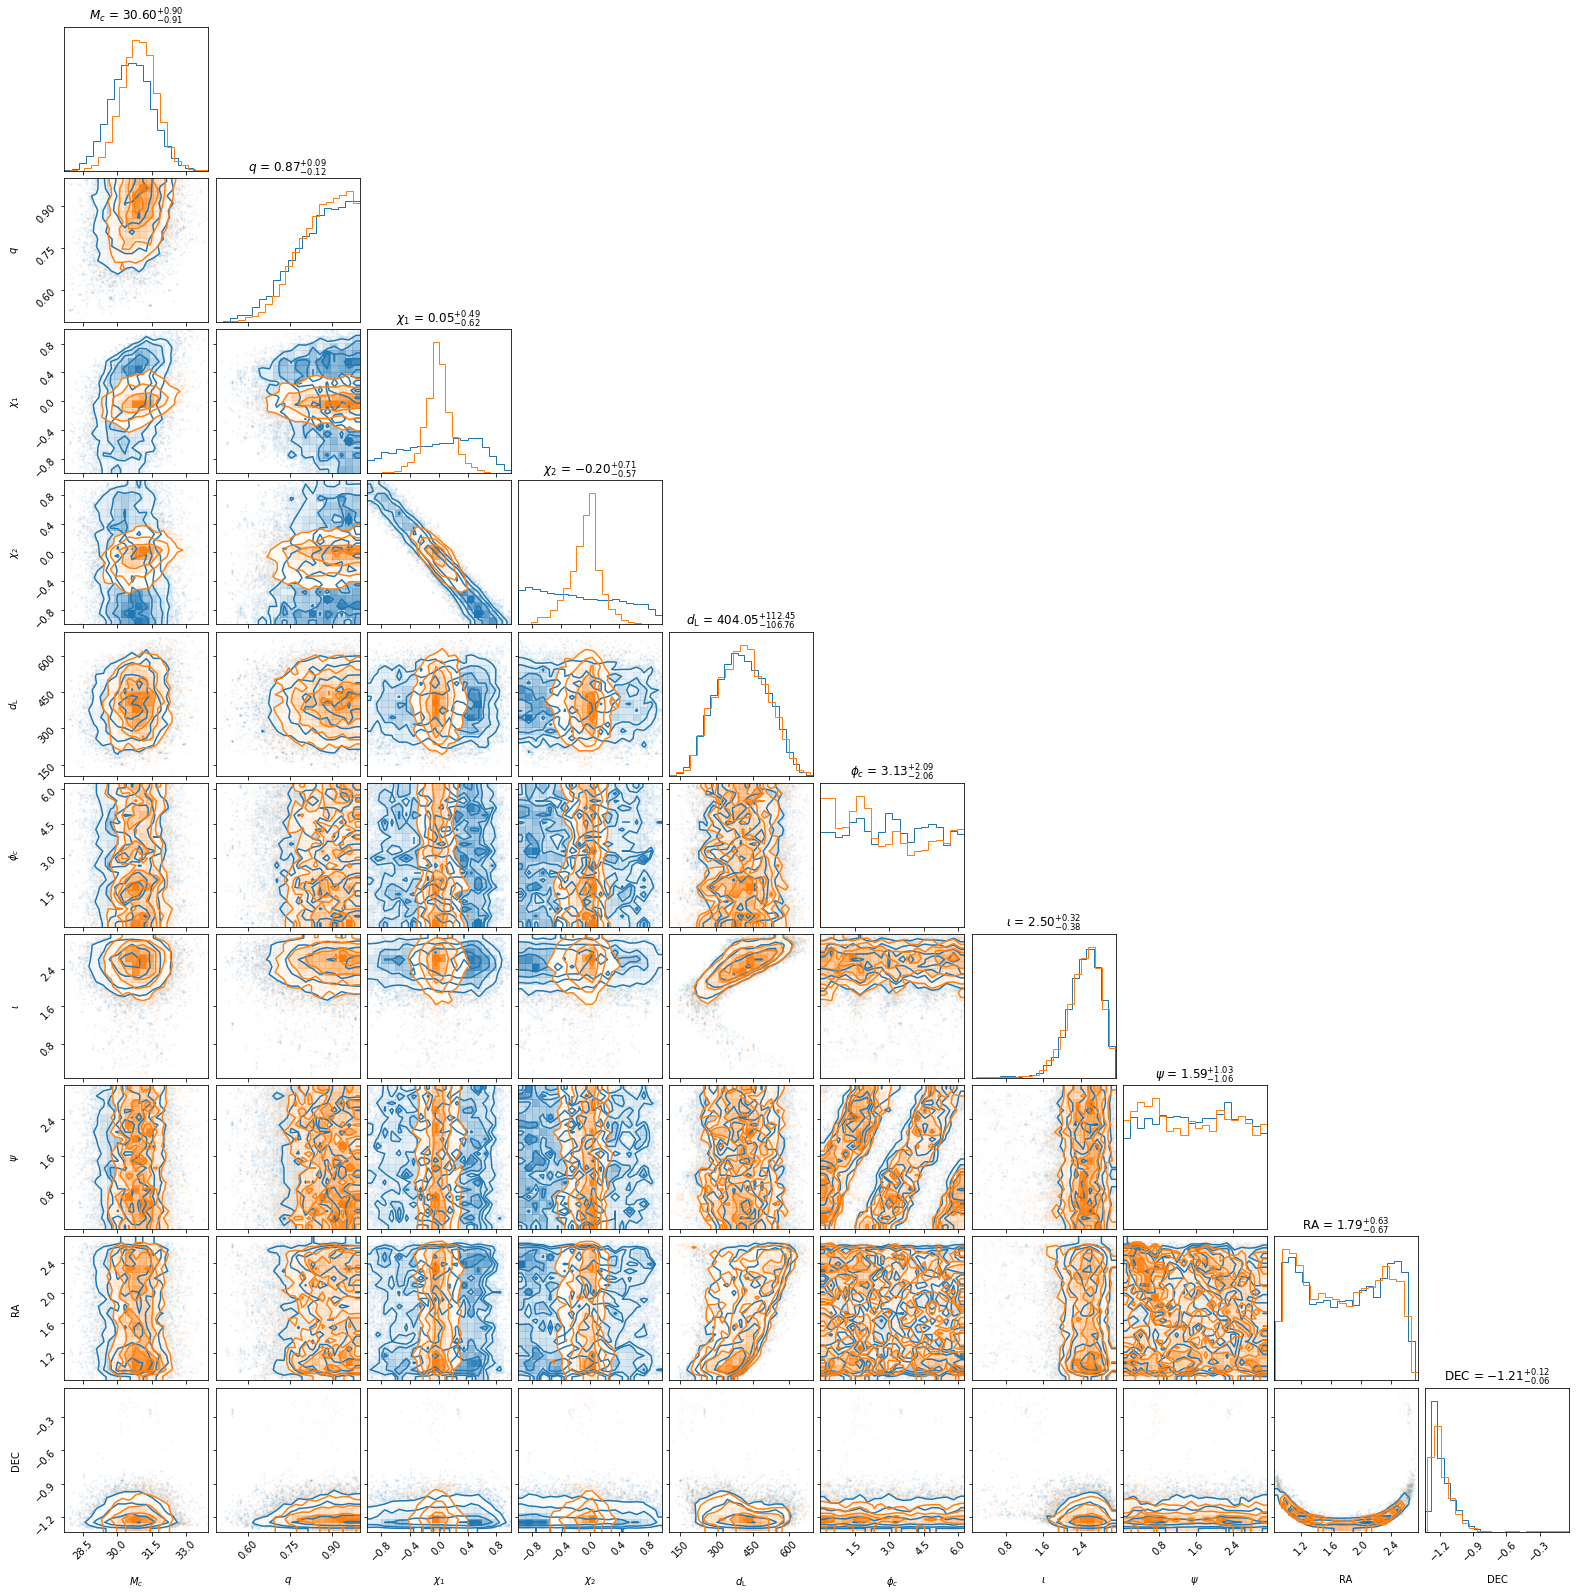

In [25]:
fig = corner.corner(flowMC_chains,color='C0',labels=axis_labels,show_titles=True,hist_kwargs={'density':True})
fig = corner.corner(bilby_chains,fig=fig,color='C1',hist_kwargs={'density':True})

In [8]:
from scipy.spatial.distance import jensenshannon
i = 1
jensenshannon(flowMC_chains[:bilby_chains.shape[0],i],bilby_chains[:,i])**2

0.003110681913329509